In [2]:
# Libraries
import io
import os
import pandas as pd
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "png"

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
# Helper functions

profile_formatter = (
    "s3://cellpainting-gallery/cpg0016-jump/"
    "{Metadata_Source}/workspace/profiles/"
    "{Metadata_Batch}/{Metadata_Plate}/{Metadata_Plate}.parquet"
)

loaddata_formatter = (
    "s3://cellpainting-gallery/cpg0016-jump/"
    "{Metadata_Source}/workspace/load_data_csv/"
    "{Metadata_Batch}/{Metadata_Plate}/load_data_with_illum.parquet"
)

In [4]:
#Load metadata info for entire dataset

if "WORKSPACE_BUCKET" in os.environ:
    # This notebook is running on Terra.
    # Notebook 'workspace_setup.ipynb' cloned the git repo to this directory under $HOME.
    # If you cloned this repository manually to a different directory, edit this value to reflect that location.
    GIT_CLONE_DIR = "~/jump-cellpainting-datasets"
else:
    GIT_CLONE_DIR = "./datasets/"

In [5]:
#METADATA
plates = pd.read_csv(os.path.join(GIT_CLONE_DIR, "metadata/plate.csv.gz"))
wells = pd.read_csv(os.path.join(GIT_CLONE_DIR, "metadata/well.csv.gz"))
compound = pd.read_csv(os.path.join(GIT_CLONE_DIR, "metadata/compound.csv.gz"))
orf = pd.read_csv(os.path.join(GIT_CLONE_DIR, "metadata/orf.csv.gz"))

For feature dataset:

In [8]:
# load profiles of all plates
dframes = []
i = 0
u = 100 #len(plates)
columns = [
    "Metadata_Source",
    "Metadata_Plate",
    "Metadata_Well",
]
for _, row in plates.iterrows():
    s3_path = profile_formatter.format(**row.to_dict())
    dframes.append(
        pd.read_parquet(s3_path, storage_options={"anon": True}, columns=columns)
    )
    i+=1
    print("profile " + str(i) + " of " + str(u) + " complete")
    if i == 100:
        break
    
dframes = pd.concat(dframes)

profile 1 of 100 complete
profile 2 of 100 complete
profile 3 of 100 complete
profile 4 of 100 complete
profile 5 of 100 complete
profile 6 of 100 complete
profile 7 of 100 complete
profile 8 of 100 complete
profile 9 of 100 complete
profile 10 of 100 complete
profile 11 of 100 complete
profile 12 of 100 complete
profile 13 of 100 complete
profile 14 of 100 complete
profile 15 of 100 complete
profile 16 of 100 complete
profile 17 of 100 complete
profile 18 of 100 complete
profile 19 of 100 complete
profile 20 of 100 complete
profile 21 of 100 complete
profile 22 of 100 complete
profile 23 of 100 complete
profile 24 of 100 complete
profile 25 of 100 complete
profile 26 of 100 complete
profile 27 of 100 complete
profile 28 of 100 complete
profile 29 of 100 complete
profile 30 of 100 complete
profile 31 of 100 complete
profile 32 of 100 complete
profile 33 of 100 complete
profile 34 of 100 complete
profile 35 of 100 complete
profile 36 of 100 complete
profile 37 of 100 complete
profile 38

In [9]:
dframes

,Metadata_Source,Metadata_Plate,Metadata_Well
0,source_1,UL000109,A02
1,source_1,UL000109,A03
2,source_1,UL000109,A04
3,source_1,UL000109,A05
4,source_1,UL000109,A06
...,...,...,...
379,source_10,Dest210608-153234,P20
380,source_10,Dest210608-153234,P21
381,source_10,Dest210608-153234,P22
382,source_10,Dest210608-153234,P23


In [10]:
# merge compounds and wells, then merge all metadata to plates list (dframes)
metadata = compound.merge(wells, on="Metadata_JCP2022")
ann_dframe = metadata.merge(
    dframes, on=["Metadata_Source", "Metadata_Plate", "Metadata_Well"]
)

In [11]:
ann_dframe

,Metadata_JCP2022,Metadata_InChIKey,Metadata_InChI,Metadata_Source,Metadata_Plate,Metadata_Well
0,JCP2022_000001,AAAHWCWPZPSPIW-UHFFFAOYSA-N,InChI=1S/C25H31N5O2/c1-4-23-26-14-16-30(23)24-...,source_1,UL001783,C29
1,JCP2022_000002,AAAJHRMBUHXWLD-UHFFFAOYSA-N,InChI=1S/C11H13ClN2O/c12-10-4-2-9(3-5-10)8-14-...,source_1,UL000087,D43
2,JCP2022_000004,AAANUZMCJQUYNX-UHFFFAOYSA-N,InChI=1S/C13H22N4O2S/c1-2-7-16-13(5-6-15-16)20...,source_1,UL001785,Q42
3,JCP2022_000007,AAATVJFGQAZXQO-UHFFFAOYSA-N,InChI=1S/C24H22N2O4S/c1-14-20(15(2)30-26-14)13...,source_1,UL001655,AD25
4,JCP2022_000009,AAAZRMGPBSWFDK-UHFFFAOYSA-N,"InChI=1S/C18H19F3N4O4S2/c19-18(20,21)13-3-1-2-...",source_1,UL001653,J28
...,...,...,...,...,...,...
97886,JCP2022_999999,NaN,NaN,source_10,Dest210608-153234,J17
97887,JCP2022_999999,NaN,NaN,source_10,Dest210608-153234,L07
97888,JCP2022_999999,NaN,NaN,source_10,Dest210608-153234,L14
97889,JCP2022_999999,NaN,NaN,source_10,Dest210608-153234,M24


In [ ]:
For image loading:

In [13]:
#gather metadata associated with images
load_data = []
i = 0
u = 100 #len(plates)
for _, row in plates.iterrows():
    s3_path = loaddata_formatter.format(**row.to_dict())
    load_data.append(pd.read_parquet(s3_path, storage_options={"anon": True}))
    i+=1
    print("profile " + str(i) + " of " + str(u) + " complete")
    if i == 100:
        break
load_data = pd.concat(load_data)

profile 1 of 100 complete
profile 2 of 100 complete
profile 3 of 100 complete
profile 4 of 100 complete
profile 5 of 100 complete
profile 6 of 100 complete
profile 7 of 100 complete
profile 8 of 100 complete
profile 9 of 100 complete
profile 10 of 100 complete
profile 11 of 100 complete
profile 12 of 100 complete
profile 13 of 100 complete
profile 14 of 100 complete
profile 15 of 100 complete
profile 16 of 100 complete
profile 17 of 100 complete
profile 18 of 100 complete
profile 19 of 100 complete
profile 20 of 100 complete
profile 21 of 100 complete
profile 22 of 100 complete
profile 23 of 100 complete
profile 24 of 100 complete
profile 25 of 100 complete
profile 26 of 100 complete
profile 27 of 100 complete
profile 28 of 100 complete
profile 29 of 100 complete
profile 30 of 100 complete
profile 31 of 100 complete
profile 32 of 100 complete
profile 33 of 100 complete
profile 34 of 100 complete
profile 35 of 100 complete
profile 36 of 100 complete
profile 37 of 100 complete
profile 38

In [14]:
# link metadata with image filepaths
linked = pd.merge(
    load_data, ann_dframe, on=["Metadata_Source", "Metadata_Plate", "Metadata_Well"]
)
linked[["Metadata_Well", "Metadata_Site"]]

,Metadata_Well,Metadata_Site
0,A02,1
1,A02,2
2,A02,3
3,A02,4
4,A03,1
...,...,...
426086,P24,2
426087,P24,3
426088,P24,4
426089,P24,5


Example to see a single image

image 1 of 10000 complete
image 2 of 10000 complete
image 3 of 10000 complete
image 4 of 10000 complete
image 5 of 10000 complete
image 6 of 10000 complete
image 7 of 10000 complete
image 8 of 10000 complete
image 9 of 10000 complete
image 10 of 10000 complete
image 11 of 10000 complete
image 12 of 10000 complete
image 13 of 10000 complete
image 14 of 10000 complete
image 15 of 10000 complete
image 16 of 10000 complete
image 17 of 10000 complete
image 18 of 10000 complete
image 19 of 10000 complete
image 20 of 10000 complete
image 21 of 10000 complete
image 22 of 10000 complete
image 23 of 10000 complete
image 24 of 10000 complete
image 25 of 10000 complete
image 26 of 10000 complete
image 27 of 10000 complete
image 28 of 10000 complete
image 29 of 10000 complete
image 30 of 10000 complete
image 31 of 10000 complete
image 32 of 10000 complete
image 33 of 10000 complete
image 34 of 10000 complete
image 35 of 10000 complete
image 36 of 10000 complete
image 37 of 10000 complete
image 38 o

image 298 of 10000 complete
image 299 of 10000 complete
image 300 of 10000 complete
image 301 of 10000 complete
image 302 of 10000 complete
image 303 of 10000 complete
image 304 of 10000 complete
image 305 of 10000 complete
image 306 of 10000 complete
image 307 of 10000 complete
image 308 of 10000 complete
image 309 of 10000 complete
image 310 of 10000 complete
image 311 of 10000 complete
image 312 of 10000 complete
image 313 of 10000 complete
image 314 of 10000 complete
image 315 of 10000 complete
image 316 of 10000 complete
image 317 of 10000 complete
image 318 of 10000 complete
image 319 of 10000 complete
image 320 of 10000 complete
image 321 of 10000 complete
image 322 of 10000 complete
image 323 of 10000 complete
image 324 of 10000 complete
image 325 of 10000 complete
image 326 of 10000 complete
image 327 of 10000 complete
image 328 of 10000 complete
image 329 of 10000 complete
image 330 of 10000 complete
image 331 of 10000 complete
image 332 of 10000 complete
image 333 of 10000 c

image 591 of 10000 complete
image 592 of 10000 complete
image 593 of 10000 complete
image 594 of 10000 complete
image 595 of 10000 complete
image 596 of 10000 complete
image 597 of 10000 complete
image 598 of 10000 complete
image 599 of 10000 complete
image 600 of 10000 complete
image 601 of 10000 complete
image 602 of 10000 complete
image 603 of 10000 complete
image 604 of 10000 complete
image 605 of 10000 complete
image 606 of 10000 complete
image 607 of 10000 complete
image 608 of 10000 complete
image 609 of 10000 complete
image 610 of 10000 complete
image 611 of 10000 complete
image 612 of 10000 complete
image 613 of 10000 complete
image 614 of 10000 complete
image 615 of 10000 complete
image 616 of 10000 complete
image 617 of 10000 complete
image 618 of 10000 complete
image 619 of 10000 complete
image 620 of 10000 complete
image 621 of 10000 complete
image 622 of 10000 complete
image 623 of 10000 complete
image 624 of 10000 complete
image 625 of 10000 complete
image 626 of 10000 c

image 884 of 10000 complete
image 885 of 10000 complete
image 886 of 10000 complete
image 887 of 10000 complete
image 888 of 10000 complete
image 889 of 10000 complete
image 890 of 10000 complete
image 891 of 10000 complete
image 892 of 10000 complete
image 893 of 10000 complete
image 894 of 10000 complete
image 895 of 10000 complete
image 896 of 10000 complete
image 897 of 10000 complete
image 898 of 10000 complete
image 899 of 10000 complete
image 900 of 10000 complete
image 901 of 10000 complete
image 902 of 10000 complete
image 903 of 10000 complete
image 904 of 10000 complete
image 905 of 10000 complete
image 906 of 10000 complete
image 907 of 10000 complete
image 908 of 10000 complete
image 909 of 10000 complete
image 910 of 10000 complete
image 911 of 10000 complete
image 912 of 10000 complete
image 913 of 10000 complete
image 914 of 10000 complete
image 915 of 10000 complete
image 916 of 10000 complete
image 917 of 10000 complete
image 918 of 10000 complete
image 919 of 10000 c

image 1171 of 10000 complete
image 1172 of 10000 complete
image 1173 of 10000 complete
image 1174 of 10000 complete
image 1175 of 10000 complete
image 1176 of 10000 complete
image 1177 of 10000 complete
image 1178 of 10000 complete
image 1179 of 10000 complete
image 1180 of 10000 complete
image 1181 of 10000 complete
image 1182 of 10000 complete
image 1183 of 10000 complete
image 1184 of 10000 complete
image 1185 of 10000 complete
image 1186 of 10000 complete
image 1187 of 10000 complete
image 1188 of 10000 complete
image 1189 of 10000 complete
image 1190 of 10000 complete
image 1191 of 10000 complete
image 1192 of 10000 complete
image 1193 of 10000 complete
image 1194 of 10000 complete
image 1195 of 10000 complete
image 1196 of 10000 complete
image 1197 of 10000 complete
image 1198 of 10000 complete
image 1199 of 10000 complete
image 1200 of 10000 complete
image 1201 of 10000 complete
image 1202 of 10000 complete
image 1203 of 10000 complete
image 1204 of 10000 complete
image 1205 of 

image 1454 of 10000 complete
image 1455 of 10000 complete
image 1456 of 10000 complete
image 1457 of 10000 complete
image 1458 of 10000 complete
image 1459 of 10000 complete
image 1460 of 10000 complete
image 1461 of 10000 complete
image 1462 of 10000 complete
image 1463 of 10000 complete
image 1464 of 10000 complete
image 1465 of 10000 complete
image 1466 of 10000 complete
image 1467 of 10000 complete
image 1468 of 10000 complete
image 1469 of 10000 complete
image 1470 of 10000 complete
image 1471 of 10000 complete
image 1472 of 10000 complete
image 1473 of 10000 complete
image 1474 of 10000 complete
image 1475 of 10000 complete
image 1476 of 10000 complete
image 1477 of 10000 complete
image 1478 of 10000 complete
image 1479 of 10000 complete
image 1480 of 10000 complete
image 1481 of 10000 complete
image 1482 of 10000 complete
image 1483 of 10000 complete
image 1484 of 10000 complete
image 1485 of 10000 complete
image 1486 of 10000 complete
image 1487 of 10000 complete
image 1488 of 

image 1737 of 10000 complete
image 1738 of 10000 complete
image 1739 of 10000 complete
image 1740 of 10000 complete
image 1741 of 10000 complete
image 1742 of 10000 complete
image 1743 of 10000 complete
image 1744 of 10000 complete
image 1745 of 10000 complete
image 1746 of 10000 complete
image 1747 of 10000 complete
image 1748 of 10000 complete
image 1749 of 10000 complete
image 1750 of 10000 complete
image 1751 of 10000 complete
image 1752 of 10000 complete
image 1753 of 10000 complete
image 1754 of 10000 complete
image 1755 of 10000 complete
image 1756 of 10000 complete
image 1757 of 10000 complete
image 1758 of 10000 complete
image 1759 of 10000 complete
image 1760 of 10000 complete
image 1761 of 10000 complete
image 1762 of 10000 complete
image 1763 of 10000 complete
image 1764 of 10000 complete
image 1765 of 10000 complete
image 1766 of 10000 complete
image 1767 of 10000 complete
image 1768 of 10000 complete
image 1769 of 10000 complete
image 1770 of 10000 complete
image 1771 of 

image 2020 of 10000 complete
image 2021 of 10000 complete
image 2022 of 10000 complete
image 2023 of 10000 complete
image 2024 of 10000 complete
image 2025 of 10000 complete
image 2026 of 10000 complete
image 2027 of 10000 complete
image 2028 of 10000 complete
image 2029 of 10000 complete
image 2030 of 10000 complete
image 2031 of 10000 complete
image 2032 of 10000 complete
image 2033 of 10000 complete
image 2034 of 10000 complete
image 2035 of 10000 complete
image 2036 of 10000 complete
image 2037 of 10000 complete
image 2038 of 10000 complete
image 2039 of 10000 complete
image 2040 of 10000 complete
image 2041 of 10000 complete
image 2042 of 10000 complete
image 2043 of 10000 complete
image 2044 of 10000 complete
image 2045 of 10000 complete
image 2046 of 10000 complete
image 2047 of 10000 complete
image 2048 of 10000 complete
image 2049 of 10000 complete
image 2050 of 10000 complete
image 2051 of 10000 complete
image 2052 of 10000 complete
image 2053 of 10000 complete
image 2054 of 

image 2303 of 10000 complete
image 2304 of 10000 complete
image 2305 of 10000 complete
image 2306 of 10000 complete
image 2307 of 10000 complete
image 2308 of 10000 complete
image 2309 of 10000 complete
image 2310 of 10000 complete
image 2311 of 10000 complete
image 2312 of 10000 complete
image 2313 of 10000 complete
image 2314 of 10000 complete
image 2315 of 10000 complete
image 2316 of 10000 complete
image 2317 of 10000 complete
image 2318 of 10000 complete
image 2319 of 10000 complete
image 2320 of 10000 complete
image 2321 of 10000 complete
image 2322 of 10000 complete
image 2323 of 10000 complete
image 2324 of 10000 complete
image 2325 of 10000 complete
image 2326 of 10000 complete
image 2327 of 10000 complete
image 2328 of 10000 complete
image 2329 of 10000 complete
image 2330 of 10000 complete
image 2331 of 10000 complete
image 2332 of 10000 complete
image 2333 of 10000 complete
image 2334 of 10000 complete
image 2335 of 10000 complete
image 2336 of 10000 complete
image 2337 of 

image 2586 of 10000 complete
image 2587 of 10000 complete
image 2588 of 10000 complete
image 2589 of 10000 complete
image 2590 of 10000 complete
image 2591 of 10000 complete
image 2592 of 10000 complete
image 2593 of 10000 complete
image 2594 of 10000 complete
image 2595 of 10000 complete
image 2596 of 10000 complete
image 2597 of 10000 complete
image 2598 of 10000 complete
image 2599 of 10000 complete
image 2600 of 10000 complete
image 2601 of 10000 complete
image 2602 of 10000 complete
image 2603 of 10000 complete
image 2604 of 10000 complete
image 2605 of 10000 complete
image 2606 of 10000 complete
image 2607 of 10000 complete
image 2608 of 10000 complete
image 2609 of 10000 complete
image 2610 of 10000 complete
image 2611 of 10000 complete
image 2612 of 10000 complete
image 2613 of 10000 complete
image 2614 of 10000 complete
image 2615 of 10000 complete
image 2616 of 10000 complete
image 2617 of 10000 complete
image 2618 of 10000 complete
image 2619 of 10000 complete
image 2620 of 

image 2869 of 10000 complete
image 2870 of 10000 complete
image 2871 of 10000 complete
image 2872 of 10000 complete
image 2873 of 10000 complete
image 2874 of 10000 complete
image 2875 of 10000 complete
image 2876 of 10000 complete
image 2877 of 10000 complete
image 2878 of 10000 complete
image 2879 of 10000 complete
image 2880 of 10000 complete
image 2881 of 10000 complete
image 2882 of 10000 complete
image 2883 of 10000 complete
image 2884 of 10000 complete
image 2885 of 10000 complete
image 2886 of 10000 complete
image 2887 of 10000 complete
image 2888 of 10000 complete
image 2889 of 10000 complete
image 2890 of 10000 complete
image 2891 of 10000 complete
image 2892 of 10000 complete
image 2893 of 10000 complete
image 2894 of 10000 complete
image 2895 of 10000 complete
image 2896 of 10000 complete
image 2897 of 10000 complete
image 2898 of 10000 complete
image 2899 of 10000 complete
image 2900 of 10000 complete
image 2901 of 10000 complete
image 2902 of 10000 complete
image 2903 of 

image 3152 of 10000 complete
image 3153 of 10000 complete
image 3154 of 10000 complete
image 3155 of 10000 complete
image 3156 of 10000 complete
image 3157 of 10000 complete
image 3158 of 10000 complete
image 3159 of 10000 complete
image 3160 of 10000 complete
image 3161 of 10000 complete
image 3162 of 10000 complete
image 3163 of 10000 complete
image 3164 of 10000 complete
image 3165 of 10000 complete
image 3166 of 10000 complete
image 3167 of 10000 complete
image 3168 of 10000 complete
image 3169 of 10000 complete
image 3170 of 10000 complete
image 3171 of 10000 complete
image 3172 of 10000 complete
image 3173 of 10000 complete
image 3174 of 10000 complete
image 3175 of 10000 complete
image 3176 of 10000 complete
image 3177 of 10000 complete
image 3178 of 10000 complete
image 3179 of 10000 complete
image 3180 of 10000 complete
image 3181 of 10000 complete
image 3182 of 10000 complete
image 3183 of 10000 complete
image 3184 of 10000 complete
image 3185 of 10000 complete
image 3186 of 

image 3435 of 10000 complete
image 3436 of 10000 complete
image 3437 of 10000 complete
image 3438 of 10000 complete
image 3439 of 10000 complete
image 3440 of 10000 complete
image 3441 of 10000 complete
image 3442 of 10000 complete
image 3443 of 10000 complete
image 3444 of 10000 complete
image 3445 of 10000 complete
image 3446 of 10000 complete
image 3447 of 10000 complete
image 3448 of 10000 complete
image 3449 of 10000 complete
image 3450 of 10000 complete
image 3451 of 10000 complete
image 3452 of 10000 complete
image 3453 of 10000 complete
image 3454 of 10000 complete
image 3455 of 10000 complete
image 3456 of 10000 complete
image 3457 of 10000 complete
image 3458 of 10000 complete
image 3459 of 10000 complete
image 3460 of 10000 complete
image 3461 of 10000 complete
image 3462 of 10000 complete
image 3463 of 10000 complete
image 3464 of 10000 complete
image 3465 of 10000 complete
image 3466 of 10000 complete
image 3467 of 10000 complete
image 3468 of 10000 complete
image 3469 of 

image 3718 of 10000 complete
image 3719 of 10000 complete
image 3720 of 10000 complete
image 3721 of 10000 complete
image 3722 of 10000 complete
image 3723 of 10000 complete
image 3724 of 10000 complete
image 3725 of 10000 complete
image 3726 of 10000 complete
image 3727 of 10000 complete
image 3728 of 10000 complete
image 3729 of 10000 complete
image 3730 of 10000 complete
image 3731 of 10000 complete
image 3732 of 10000 complete
image 3733 of 10000 complete
image 3734 of 10000 complete
image 3735 of 10000 complete
image 3736 of 10000 complete
image 3737 of 10000 complete
image 3738 of 10000 complete
image 3739 of 10000 complete
image 3740 of 10000 complete
image 3741 of 10000 complete
image 3742 of 10000 complete
image 3743 of 10000 complete
image 3744 of 10000 complete
image 3745 of 10000 complete
image 3746 of 10000 complete
image 3747 of 10000 complete
image 3748 of 10000 complete
image 3749 of 10000 complete
image 3750 of 10000 complete
image 3751 of 10000 complete
image 3752 of 

image 4001 of 10000 complete
image 4002 of 10000 complete
image 4003 of 10000 complete
image 4004 of 10000 complete
image 4005 of 10000 complete
image 4006 of 10000 complete
image 4007 of 10000 complete
image 4008 of 10000 complete
image 4009 of 10000 complete
image 4010 of 10000 complete
image 4011 of 10000 complete
image 4012 of 10000 complete
image 4013 of 10000 complete
image 4014 of 10000 complete
image 4015 of 10000 complete
image 4016 of 10000 complete
image 4017 of 10000 complete
image 4018 of 10000 complete
image 4019 of 10000 complete
image 4020 of 10000 complete
image 4021 of 10000 complete
image 4022 of 10000 complete
image 4023 of 10000 complete
image 4024 of 10000 complete
image 4025 of 10000 complete
image 4026 of 10000 complete
image 4027 of 10000 complete
image 4028 of 10000 complete
image 4029 of 10000 complete
image 4030 of 10000 complete
image 4031 of 10000 complete
image 4032 of 10000 complete
image 4033 of 10000 complete
image 4034 of 10000 complete
image 4035 of 

image 4284 of 10000 complete
image 4285 of 10000 complete
image 4286 of 10000 complete
image 4287 of 10000 complete
image 4288 of 10000 complete
image 4289 of 10000 complete
image 4290 of 10000 complete
image 4291 of 10000 complete
image 4292 of 10000 complete
image 4293 of 10000 complete
image 4294 of 10000 complete
image 4295 of 10000 complete
image 4296 of 10000 complete
image 4297 of 10000 complete
image 4298 of 10000 complete
image 4299 of 10000 complete
image 4300 of 10000 complete
image 4301 of 10000 complete
image 4302 of 10000 complete
image 4303 of 10000 complete
image 4304 of 10000 complete
image 4305 of 10000 complete
image 4306 of 10000 complete
image 4307 of 10000 complete
image 4308 of 10000 complete
image 4309 of 10000 complete
image 4310 of 10000 complete
image 4311 of 10000 complete
image 4312 of 10000 complete
image 4313 of 10000 complete
image 4314 of 10000 complete
image 4315 of 10000 complete
image 4316 of 10000 complete
image 4317 of 10000 complete
image 4318 of 

image 4567 of 10000 complete
image 4568 of 10000 complete
image 4569 of 10000 complete
image 4570 of 10000 complete
image 4571 of 10000 complete
image 4572 of 10000 complete
image 4573 of 10000 complete
image 4574 of 10000 complete
image 4575 of 10000 complete
image 4576 of 10000 complete
image 4577 of 10000 complete
image 4578 of 10000 complete
image 4579 of 10000 complete
image 4580 of 10000 complete
image 4581 of 10000 complete
image 4582 of 10000 complete
image 4583 of 10000 complete
image 4584 of 10000 complete
image 4585 of 10000 complete
image 4586 of 10000 complete
image 4587 of 10000 complete
image 4588 of 10000 complete
image 4589 of 10000 complete
image 4590 of 10000 complete
image 4591 of 10000 complete
image 4592 of 10000 complete
image 4593 of 10000 complete
image 4594 of 10000 complete
image 4595 of 10000 complete
image 4596 of 10000 complete
image 4597 of 10000 complete
image 4598 of 10000 complete
image 4599 of 10000 complete
image 4600 of 10000 complete
image 4601 of 

image 4850 of 10000 complete
image 4851 of 10000 complete
image 4852 of 10000 complete
image 4853 of 10000 complete
image 4854 of 10000 complete
image 4855 of 10000 complete
image 4856 of 10000 complete
image 4857 of 10000 complete
image 4858 of 10000 complete
image 4859 of 10000 complete
image 4860 of 10000 complete
image 4861 of 10000 complete
image 4862 of 10000 complete
image 4863 of 10000 complete
image 4864 of 10000 complete
image 4865 of 10000 complete
image 4866 of 10000 complete
image 4867 of 10000 complete
image 4868 of 10000 complete
image 4869 of 10000 complete
image 4870 of 10000 complete
image 4871 of 10000 complete
image 4872 of 10000 complete
image 4873 of 10000 complete
image 4874 of 10000 complete
image 4875 of 10000 complete
image 4876 of 10000 complete
image 4877 of 10000 complete
image 4878 of 10000 complete
image 4879 of 10000 complete
image 4880 of 10000 complete
image 4881 of 10000 complete
image 4882 of 10000 complete
image 4883 of 10000 complete
image 4884 of 

image 5133 of 10000 complete
image 5134 of 10000 complete
image 5135 of 10000 complete
image 5136 of 10000 complete
image 5137 of 10000 complete
image 5138 of 10000 complete
image 5139 of 10000 complete
image 5140 of 10000 complete
image 5141 of 10000 complete
image 5142 of 10000 complete
image 5143 of 10000 complete
image 5144 of 10000 complete
image 5145 of 10000 complete
image 5146 of 10000 complete
image 5147 of 10000 complete
image 5148 of 10000 complete
image 5149 of 10000 complete
image 5150 of 10000 complete
image 5151 of 10000 complete
image 5152 of 10000 complete
image 5153 of 10000 complete
image 5154 of 10000 complete
image 5155 of 10000 complete
image 5156 of 10000 complete
image 5157 of 10000 complete
image 5158 of 10000 complete
image 5159 of 10000 complete
image 5160 of 10000 complete
image 5161 of 10000 complete
image 5162 of 10000 complete
image 5163 of 10000 complete
image 5164 of 10000 complete
image 5165 of 10000 complete
image 5166 of 10000 complete
image 5167 of 

image 5416 of 10000 complete
image 5417 of 10000 complete
image 5418 of 10000 complete
image 5419 of 10000 complete
image 5420 of 10000 complete
image 5421 of 10000 complete
image 5422 of 10000 complete
image 5423 of 10000 complete
image 5424 of 10000 complete
image 5425 of 10000 complete
image 5426 of 10000 complete
image 5427 of 10000 complete
image 5428 of 10000 complete
image 5429 of 10000 complete
image 5430 of 10000 complete
image 5431 of 10000 complete
image 5432 of 10000 complete
image 5433 of 10000 complete
image 5434 of 10000 complete
image 5435 of 10000 complete
image 5436 of 10000 complete
image 5437 of 10000 complete
image 5438 of 10000 complete
image 5439 of 10000 complete
image 5440 of 10000 complete
image 5441 of 10000 complete
image 5442 of 10000 complete
image 5443 of 10000 complete
image 5444 of 10000 complete
image 5445 of 10000 complete
image 5446 of 10000 complete
image 5447 of 10000 complete
image 5448 of 10000 complete
image 5449 of 10000 complete
image 5450 of 

image 5699 of 10000 complete
image 5700 of 10000 complete
image 5701 of 10000 complete
image 5702 of 10000 complete
image 5703 of 10000 complete
image 5704 of 10000 complete
image 5705 of 10000 complete
image 5706 of 10000 complete
image 5707 of 10000 complete
image 5708 of 10000 complete
image 5709 of 10000 complete
image 5710 of 10000 complete
image 5711 of 10000 complete
image 5712 of 10000 complete
image 5713 of 10000 complete
image 5714 of 10000 complete
image 5715 of 10000 complete
image 5716 of 10000 complete
image 5717 of 10000 complete
image 5718 of 10000 complete
image 5719 of 10000 complete
image 5720 of 10000 complete
image 5721 of 10000 complete
image 5722 of 10000 complete
image 5723 of 10000 complete
image 5724 of 10000 complete
image 5725 of 10000 complete
image 5726 of 10000 complete
image 5727 of 10000 complete
image 5728 of 10000 complete
image 5729 of 10000 complete
image 5730 of 10000 complete
image 5731 of 10000 complete
image 5732 of 10000 complete
image 5733 of 

image 5982 of 10000 complete
image 5983 of 10000 complete
image 5984 of 10000 complete
image 5985 of 10000 complete
image 5986 of 10000 complete
image 5987 of 10000 complete
image 5988 of 10000 complete
image 5989 of 10000 complete
image 5990 of 10000 complete
image 5991 of 10000 complete
image 5992 of 10000 complete
image 5993 of 10000 complete
image 5994 of 10000 complete
image 5995 of 10000 complete
image 5996 of 10000 complete
image 5997 of 10000 complete
image 5998 of 10000 complete
image 5999 of 10000 complete
image 6000 of 10000 complete
image 6001 of 10000 complete
image 6002 of 10000 complete
image 6003 of 10000 complete
image 6004 of 10000 complete
image 6005 of 10000 complete
image 6006 of 10000 complete
image 6007 of 10000 complete
image 6008 of 10000 complete
image 6009 of 10000 complete
image 6010 of 10000 complete
image 6011 of 10000 complete
image 6012 of 10000 complete
image 6013 of 10000 complete
image 6014 of 10000 complete
image 6015 of 10000 complete
image 6016 of 

image 6265 of 10000 complete
image 6266 of 10000 complete
image 6267 of 10000 complete
image 6268 of 10000 complete
image 6269 of 10000 complete
image 6270 of 10000 complete
image 6271 of 10000 complete
image 6272 of 10000 complete
image 6273 of 10000 complete
image 6274 of 10000 complete
image 6275 of 10000 complete
image 6276 of 10000 complete
image 6277 of 10000 complete
image 6278 of 10000 complete
image 6279 of 10000 complete
image 6280 of 10000 complete
image 6281 of 10000 complete
image 6282 of 10000 complete
image 6283 of 10000 complete
image 6284 of 10000 complete
image 6285 of 10000 complete
image 6286 of 10000 complete
image 6287 of 10000 complete
image 6288 of 10000 complete
image 6289 of 10000 complete
image 6290 of 10000 complete
image 6291 of 10000 complete
image 6292 of 10000 complete
image 6293 of 10000 complete
image 6294 of 10000 complete
image 6295 of 10000 complete
image 6296 of 10000 complete
image 6297 of 10000 complete
image 6298 of 10000 complete
image 6299 of 

image 6548 of 10000 complete
image 6549 of 10000 complete
image 6550 of 10000 complete
image 6551 of 10000 complete
image 6552 of 10000 complete
image 6553 of 10000 complete
image 6554 of 10000 complete
image 6555 of 10000 complete
image 6556 of 10000 complete
image 6557 of 10000 complete
image 6558 of 10000 complete
image 6559 of 10000 complete
image 6560 of 10000 complete
image 6561 of 10000 complete
image 6562 of 10000 complete
image 6563 of 10000 complete
image 6564 of 10000 complete
image 6565 of 10000 complete
image 6566 of 10000 complete
image 6567 of 10000 complete
image 6568 of 10000 complete
image 6569 of 10000 complete
image 6570 of 10000 complete
image 6571 of 10000 complete
image 6572 of 10000 complete
image 6573 of 10000 complete
image 6574 of 10000 complete
image 6575 of 10000 complete
image 6576 of 10000 complete
image 6577 of 10000 complete
image 6578 of 10000 complete
image 6579 of 10000 complete
image 6580 of 10000 complete
image 6581 of 10000 complete
image 6582 of 

image 6831 of 10000 complete
image 6832 of 10000 complete
image 6833 of 10000 complete
image 6834 of 10000 complete
image 6835 of 10000 complete
image 6836 of 10000 complete
image 6837 of 10000 complete
image 6838 of 10000 complete
image 6839 of 10000 complete
image 6840 of 10000 complete
image 6841 of 10000 complete
image 6842 of 10000 complete
image 6843 of 10000 complete
image 6844 of 10000 complete
image 6845 of 10000 complete
image 6846 of 10000 complete
image 6847 of 10000 complete
image 6848 of 10000 complete
image 6849 of 10000 complete
image 6850 of 10000 complete
image 6851 of 10000 complete
image 6852 of 10000 complete
image 6853 of 10000 complete
image 6854 of 10000 complete
image 6855 of 10000 complete
image 6856 of 10000 complete
image 6857 of 10000 complete
image 6858 of 10000 complete
image 6859 of 10000 complete
image 6860 of 10000 complete
image 6861 of 10000 complete
image 6862 of 10000 complete
image 6863 of 10000 complete
image 6864 of 10000 complete
image 6865 of 

image 7114 of 10000 complete
image 7115 of 10000 complete
image 7116 of 10000 complete
image 7117 of 10000 complete
image 7118 of 10000 complete
image 7119 of 10000 complete
image 7120 of 10000 complete
image 7121 of 10000 complete
image 7122 of 10000 complete
image 7123 of 10000 complete
image 7124 of 10000 complete
image 7125 of 10000 complete
image 7126 of 10000 complete
image 7127 of 10000 complete
image 7128 of 10000 complete
image 7129 of 10000 complete
image 7130 of 10000 complete
image 7131 of 10000 complete
image 7132 of 10000 complete
image 7133 of 10000 complete
image 7134 of 10000 complete
image 7135 of 10000 complete
image 7136 of 10000 complete
image 7137 of 10000 complete
image 7138 of 10000 complete
image 7139 of 10000 complete
image 7140 of 10000 complete
image 7141 of 10000 complete
image 7142 of 10000 complete
image 7143 of 10000 complete
image 7144 of 10000 complete
image 7145 of 10000 complete
image 7146 of 10000 complete
image 7147 of 10000 complete
image 7148 of 

image 7397 of 10000 complete
image 7398 of 10000 complete
image 7399 of 10000 complete
image 7400 of 10000 complete
image 7401 of 10000 complete
image 7402 of 10000 complete
image 7403 of 10000 complete
image 7404 of 10000 complete
image 7405 of 10000 complete
image 7406 of 10000 complete
image 7407 of 10000 complete
image 7408 of 10000 complete
image 7409 of 10000 complete
image 7410 of 10000 complete
image 7411 of 10000 complete
image 7412 of 10000 complete
image 7413 of 10000 complete
image 7414 of 10000 complete
image 7415 of 10000 complete
image 7416 of 10000 complete
image 7417 of 10000 complete
image 7418 of 10000 complete
image 7419 of 10000 complete
image 7420 of 10000 complete
image 7421 of 10000 complete
image 7422 of 10000 complete
image 7423 of 10000 complete
image 7424 of 10000 complete
image 7425 of 10000 complete
image 7426 of 10000 complete
image 7427 of 10000 complete
image 7428 of 10000 complete
image 7429 of 10000 complete
image 7430 of 10000 complete
image 7431 of 

image 7680 of 10000 complete
image 7681 of 10000 complete
image 7682 of 10000 complete
image 7683 of 10000 complete
image 7684 of 10000 complete
image 7685 of 10000 complete
image 7686 of 10000 complete
image 7687 of 10000 complete
image 7688 of 10000 complete
image 7689 of 10000 complete
image 7690 of 10000 complete
image 7691 of 10000 complete
image 7692 of 10000 complete
image 7693 of 10000 complete
image 7694 of 10000 complete
image 7695 of 10000 complete
image 7696 of 10000 complete
image 7697 of 10000 complete
image 7698 of 10000 complete
image 7699 of 10000 complete
image 7700 of 10000 complete
image 7701 of 10000 complete
image 7702 of 10000 complete
image 7703 of 10000 complete
image 7704 of 10000 complete
image 7705 of 10000 complete
image 7706 of 10000 complete
image 7707 of 10000 complete
image 7708 of 10000 complete
image 7709 of 10000 complete
image 7710 of 10000 complete
image 7711 of 10000 complete
image 7712 of 10000 complete
image 7713 of 10000 complete
image 7714 of 

image 7963 of 10000 complete
image 7964 of 10000 complete
image 7965 of 10000 complete
image 7966 of 10000 complete
image 7967 of 10000 complete
image 7968 of 10000 complete
image 7969 of 10000 complete
image 7970 of 10000 complete
image 7971 of 10000 complete
image 7972 of 10000 complete
image 7973 of 10000 complete
image 7974 of 10000 complete
image 7975 of 10000 complete
image 7976 of 10000 complete
image 7977 of 10000 complete
image 7978 of 10000 complete
image 7979 of 10000 complete
image 7980 of 10000 complete
image 7981 of 10000 complete
image 7982 of 10000 complete
image 7983 of 10000 complete
image 7984 of 10000 complete
image 7985 of 10000 complete
image 7986 of 10000 complete
image 7987 of 10000 complete
image 7988 of 10000 complete
image 7989 of 10000 complete
image 7990 of 10000 complete
image 7991 of 10000 complete
image 7992 of 10000 complete
image 7993 of 10000 complete
image 7994 of 10000 complete
image 7995 of 10000 complete
image 7996 of 10000 complete
image 7997 of 

image 8246 of 10000 complete
image 8247 of 10000 complete
image 8248 of 10000 complete
image 8249 of 10000 complete
image 8250 of 10000 complete
image 8251 of 10000 complete
image 8252 of 10000 complete
image 8253 of 10000 complete
image 8254 of 10000 complete
image 8255 of 10000 complete
image 8256 of 10000 complete
image 8257 of 10000 complete
image 8258 of 10000 complete
image 8259 of 10000 complete
image 8260 of 10000 complete
image 8261 of 10000 complete
image 8262 of 10000 complete
image 8263 of 10000 complete
image 8264 of 10000 complete
image 8265 of 10000 complete
image 8266 of 10000 complete
image 8267 of 10000 complete
image 8268 of 10000 complete
image 8269 of 10000 complete
image 8270 of 10000 complete
image 8271 of 10000 complete
image 8272 of 10000 complete
image 8273 of 10000 complete
image 8274 of 10000 complete
image 8275 of 10000 complete
image 8276 of 10000 complete
image 8277 of 10000 complete
image 8278 of 10000 complete
image 8279 of 10000 complete
image 8280 of 

image 8529 of 10000 complete
image 8530 of 10000 complete
image 8531 of 10000 complete
image 8532 of 10000 complete
image 8533 of 10000 complete
image 8534 of 10000 complete
image 8535 of 10000 complete
image 8536 of 10000 complete
image 8537 of 10000 complete
image 8538 of 10000 complete
image 8539 of 10000 complete
image 8540 of 10000 complete
image 8541 of 10000 complete
image 8542 of 10000 complete
image 8543 of 10000 complete
image 8544 of 10000 complete
image 8545 of 10000 complete
image 8546 of 10000 complete
image 8547 of 10000 complete
image 8548 of 10000 complete
image 8549 of 10000 complete
image 8550 of 10000 complete
image 8551 of 10000 complete
image 8552 of 10000 complete
image 8553 of 10000 complete
image 8554 of 10000 complete
image 8555 of 10000 complete
image 8556 of 10000 complete
image 8557 of 10000 complete
image 8558 of 10000 complete
image 8559 of 10000 complete
image 8560 of 10000 complete
image 8561 of 10000 complete
image 8562 of 10000 complete
image 8563 of 

image 8812 of 10000 complete
image 8813 of 10000 complete
image 8814 of 10000 complete
image 8815 of 10000 complete
image 8816 of 10000 complete
image 8817 of 10000 complete
image 8818 of 10000 complete
image 8819 of 10000 complete
image 8820 of 10000 complete
image 8821 of 10000 complete
image 8822 of 10000 complete
image 8823 of 10000 complete
image 8824 of 10000 complete
image 8825 of 10000 complete
image 8826 of 10000 complete
image 8827 of 10000 complete
image 8828 of 10000 complete
image 8829 of 10000 complete
image 8830 of 10000 complete
image 8831 of 10000 complete
image 8832 of 10000 complete
image 8833 of 10000 complete
image 8834 of 10000 complete
image 8835 of 10000 complete
image 8836 of 10000 complete
image 8837 of 10000 complete
image 8838 of 10000 complete
image 8839 of 10000 complete
image 8840 of 10000 complete
image 8841 of 10000 complete
image 8842 of 10000 complete
image 8843 of 10000 complete
image 8844 of 10000 complete
image 8845 of 10000 complete
image 8846 of 

image 9095 of 10000 complete
image 9096 of 10000 complete
image 9097 of 10000 complete
image 9098 of 10000 complete
image 9099 of 10000 complete
image 9100 of 10000 complete
image 9101 of 10000 complete
image 9102 of 10000 complete
image 9103 of 10000 complete
image 9104 of 10000 complete
image 9105 of 10000 complete
image 9106 of 10000 complete
image 9107 of 10000 complete
image 9108 of 10000 complete
image 9109 of 10000 complete
image 9110 of 10000 complete
image 9111 of 10000 complete
image 9112 of 10000 complete
image 9113 of 10000 complete
image 9114 of 10000 complete
image 9115 of 10000 complete
image 9116 of 10000 complete
image 9117 of 10000 complete
image 9118 of 10000 complete
image 9119 of 10000 complete
image 9120 of 10000 complete
image 9121 of 10000 complete
image 9122 of 10000 complete
image 9123 of 10000 complete
image 9124 of 10000 complete
image 9125 of 10000 complete
image 9126 of 10000 complete
image 9127 of 10000 complete
image 9128 of 10000 complete
image 9129 of 

image 9378 of 10000 complete
image 9379 of 10000 complete
image 9380 of 10000 complete
image 9381 of 10000 complete
image 9382 of 10000 complete
image 9383 of 10000 complete
image 9384 of 10000 complete
image 9385 of 10000 complete
image 9386 of 10000 complete
image 9387 of 10000 complete
image 9388 of 10000 complete
image 9389 of 10000 complete
image 9390 of 10000 complete
image 9391 of 10000 complete
image 9392 of 10000 complete
image 9393 of 10000 complete
image 9394 of 10000 complete
image 9395 of 10000 complete
image 9396 of 10000 complete
image 9397 of 10000 complete
image 9398 of 10000 complete
image 9399 of 10000 complete
image 9400 of 10000 complete
image 9401 of 10000 complete
image 9402 of 10000 complete
image 9403 of 10000 complete
image 9404 of 10000 complete
image 9405 of 10000 complete
image 9406 of 10000 complete
image 9407 of 10000 complete
image 9408 of 10000 complete
image 9409 of 10000 complete
image 9410 of 10000 complete
image 9411 of 10000 complete
image 9412 of 

image 9661 of 10000 complete
image 9662 of 10000 complete
image 9663 of 10000 complete
image 9664 of 10000 complete
image 9665 of 10000 complete
image 9666 of 10000 complete
image 9667 of 10000 complete
image 9668 of 10000 complete
image 9669 of 10000 complete
image 9670 of 10000 complete
image 9671 of 10000 complete
image 9672 of 10000 complete
image 9673 of 10000 complete
image 9674 of 10000 complete
image 9675 of 10000 complete
image 9676 of 10000 complete
image 9677 of 10000 complete
image 9678 of 10000 complete
image 9679 of 10000 complete
image 9680 of 10000 complete
image 9681 of 10000 complete
image 9682 of 10000 complete
image 9683 of 10000 complete
image 9684 of 10000 complete
image 9685 of 10000 complete
image 9686 of 10000 complete
image 9687 of 10000 complete
image 9688 of 10000 complete
image 9689 of 10000 complete
image 9690 of 10000 complete
image 9691 of 10000 complete
image 9692 of 10000 complete
image 9693 of 10000 complete
image 9694 of 10000 complete
image 9695 of 

image 9944 of 10000 complete
image 9945 of 10000 complete
image 9946 of 10000 complete
image 9947 of 10000 complete
image 9948 of 10000 complete
image 9949 of 10000 complete
image 9950 of 10000 complete
image 9951 of 10000 complete
image 9952 of 10000 complete
image 9953 of 10000 complete
image 9954 of 10000 complete
image 9955 of 10000 complete
image 9956 of 10000 complete
image 9957 of 10000 complete
image 9958 of 10000 complete
image 9959 of 10000 complete
image 9960 of 10000 complete
image 9961 of 10000 complete
image 9962 of 10000 complete
image 9963 of 10000 complete
image 9964 of 10000 complete
image 9965 of 10000 complete
image 9966 of 10000 complete
image 9967 of 10000 complete
image 9968 of 10000 complete
image 9969 of 10000 complete
image 9970 of 10000 complete
image 9971 of 10000 complete
image 9972 of 10000 complete
image 9973 of 10000 complete
image 9974 of 10000 complete
image 9975 of 10000 complete
image 9976 of 10000 complete
image 9977 of 10000 complete
image 9978 of 

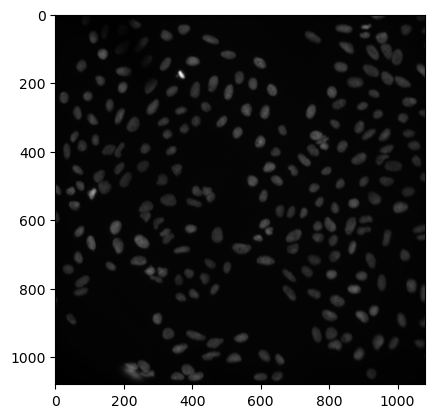

In [531]:
import os
import requests
from io import BytesIO
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import boto3
from botocore import UNSIGNED
from botocore.config import Config
i = 0
u = 10000 #len(linked)
test_images = []
test_targets = []
train_images = []
train_targets = []
all_targets = []
for _, row in linked.iterrows():
    image_url = os.path.join(
        row.PathName_OrigDNA, row.FileName_OrigDNA
    )
    s3_client = boto3.client("s3", config=Config(signature_version=UNSIGNED))
    response = s3_client.get_object(
        Bucket=image_url.split("/")[2], Key="/".join(image_url.split("/")[3:])
    )
    image = mpimg.imread(BytesIO(response["Body"].read()), format="tiff")
    target = row.Metadata_InChIKey

    plt.imshow(image, cmap = "gray") # , cmap="gray"
    image_url
    all_targets.append(target)
    if i < 5000:
        train_images.append(image)
        train_targets.append(target)
    else:
        test_images.append(image)
        test_targets.append(target)
        
    i+=1
    print("image " + str(i) + " of " + str(u) + " complete")
    if i == u:
        break
    

Convert images to tensors

In [532]:
# pytorch libraries
import numpy as np

from tqdm import tqdm, trange

import torch
import torch.nn as nn
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from torch.utils.data import Dataset, DataLoader

from torchvision.transforms import ToTensor
from sklearn.preprocessing import LabelEncoder

np.random.seed(0)
torch.manual_seed(0)

In [533]:
# get number of unique labels
unique_vals = set(all_targets)
num_targets = len(unique_vals)
print(num_targets)
print(unique_vals)

902


In [534]:
# convert labels (strings) into tensor
label_encoder = LabelEncoder()
numerical_labels_train = label_encoder.fit_transform(train_targets)
numerical_labels_test = label_encoder.fit_transform(test_targets)
print(len(numerical_labels_train))
original_labels_train = label_encoder.inverse_transform(numerical_labels_train)
original_labels_test = label_encoder.inverse_transform(numerical_labels_test)

5000


In [535]:
train_labels = torch.from_numpy(numerical_labels_train)
test_labels = torch.from_numpy(numerical_labels_test)

In [536]:
# transform = ToTensor() # transform images into pytorch tensors

# convert images into int and transfrom into tensors
for i in range(len(train_images)):
    trainimage = train_images[i].astype(int)
    testimage = test_images[i].astype(int)
#     num = numerical_labels[i].astype(int)
    train_images[i] = trainimage #tensor_image
    test_images[i] = testimage
#     numerical_labels[i] = num

# size: 1x1080x1080


In [537]:
# print(len(train_labels))
# print(len(train_targets))
# print(len(train_images))
# print(train_labels)


In [538]:
class CustomImageDataset(Dataset):
    def __init__(self, images, targets, transform=None):
        self.images = images
        self.targets = targets
        self.transform = transform
#         self.target_transform = target_transform

    def __len__(self):
        return len(self.targets)

    def __getitem__(self, idx):
        image = self.images[idx]
        target = self.targets[idx]

        if self.transform:
            image = self.transform(image)
#         if self.target_transform:
#             target = self.target_transform(target)
        
        return image, target

In [539]:
transform = ToTensor()
train_dataset = CustomImageDataset(train_images, train_labels, transform)
test_dataset = CustomImageDataset(test_images, test_labels, transform)

In [540]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [541]:
# train_features, train_labels = next(iter(train_loader))
# print(f"Feature batch shape: {train_features.size()}")
# print(f"Labels batch shape: {train_labels.size()}")
# img = train_features[3].squeeze()
# label = train_labels[0]
# plt.imshow(img, cmap="gray")
# plt.show()
# print(f"Label: {label}")

In [542]:
# train_features, train_labels = next(iter(train_loader))
# print(f"Feature batch shape: {train_features.size()}")
# print(f"Labels batch shape: {train_labels.size()}")
# img = train_features[4].squeeze()
# label = train_labels[0]
# plt.imshow(img, cmap="gray")
# plt.show()
# print(f"Label: {label}")

In [543]:
# building the transformer model for image classification
class Transformer(nn.Module):
      def __init__(self, chw, n_patches=7, n_blocks=2, hidden_d=8, n_heads=2, out_d=2):
        # Super constructor
        super(Transformer, self).__init__()

        #create the transformer layers with given parameters
        self.chw = chw # attribute that represents # of channels (C), height (H), and Width(W) of the images
        self.n_patches = n_patches # number of patches to divide the input image into
        self.n_blocks = n_blocks # number of transformer blocks/layers in the model
        self.n_heads = n_heads # the number of attention heads in the multi-head self-attention mechanism.
        self.hidden_d = hidden_d # specifies the dimensionality of the hidden layers within the transformer.


        # Assert that the second dimension of the input shape (height) is divisible by the number of patches.
        # If this condition is not met, it would indicate that the input cannot be evenly divided into patches.
        assert chw[1] % n_patches == 0, "Input shape not entirely divisible by number of patches"

        # Assert that the third dimension of the input shape (width) is divisible by the number of patches.
        # Similar to the previous assertion, this ensures even division of the input into patches.
        assert chw[2] % n_patches == 0, "Input shape not entirely divisible by the number of patches"

        # Linear mapper
        self.patch_size = (chw[1] / n_patches, chw[2] / n_patches)

        # Define a linear layer (self.linear_mapper) using PyTorch's nn.Linear module.
        self.input_d = int(chw[0] * self.patch_size[0] * self.patch_size[1])
        self.linear_mapper = nn.Linear(self.input_d, self.hidden_d)

        # Create a class token as a learnable parameter using PyTorch's nn.Parameter.
        self.class_token = nn.Parameter(torch.rand(1, self.hidden_d))

        # Register positional embeddings as a buffer in the model.
        self.register_buffer('positional_embeddings', get_positional_embeddings(n_patches ** 2 + 1, hidden_d), persistent=False)

        # Create a list of transformer encoder blocks using nn.ModuleList.
        self.blocks = nn.ModuleList([MyViTBlock(hidden_d, n_heads) for _ in range(n_blocks)])

        # Define an MLP (Multi-Layer Perceptron) using PyTorch's nn.Sequential module.
        self.mlp = nn.Sequential(
            nn.Linear(self.hidden_d, out_d),  # Linear transformation
            nn.Softmax(dim=-1)  # Softmax activation for probability distribution
        )

      def forward(self, images):
          # Dividing images into patches
          n, c, h, w = images.shape

          # Create patches by dividing the input 'images' into non-overlapping patches.
          # The resulting 'patches' is a tensor containing the divided patches of the input 'images', ready for further processing.
          patches = patchify(images, self.n_patches).to(self.positional_embeddings.device)



          # Running linear layer tokenization
          tokens = self.linear_mapper(patches)

          # Adding classification token to the tokens
          tokens = torch.cat((self.class_token.expand(n, 1, -1), tokens), dim=1)

          # Adding positional embedding
          # This ensures that the positional embeddings align with each patch in the batch.
          out = tokens + self.positional_embeddings.repeat(n, 1, 1)

          # Transformer Blocks
          # This process helps the model capture complex patterns and dependencies within the data.
          for block in self.blocks:
              out = block(out)

          # Getting the classification token only
          out = out[:, 0]

          return self.mlp(out)  # Map to output dimension, output category distribution






In [544]:
# Define a PyTorch module called 'MyMSA' for Multi-Head Self-Attention.
class MyMSA(nn.Module):
    def __init__(self, d, n_heads=2):
        super(MyMSA, self).__init__()

        # Initialize the module with the specified parameters.

        # 'd' represents the dimensionality of the model's hidden layers.
        self.d = d

        # 'n_heads' represents the number of attention heads to use in the self-attention mechanism.
        # It determines how many different patterns or features the model can attend to.
        self.n_heads = n_heads

        # Check if the dimension 'd' is evenly divisible by the number of attention heads 'n_heads'.
        # In the context of self-attention, the dimension should be divisible to ensure a valid splitting of attention.
        # 'd' represents the dimensionality of the hidden layers in the model.
        # 'n_heads' represents the number of attention heads to be used in the self-attention mechanism.
        # If 'd' is not divisible by 'n_heads', it would indicate an incompatible configuration for self-attention,
        # and an error message is raised with an explanation.
        assert d % n_heads == 0, f"Can't divide dimension {d} into {n_heads} heads"

        # Calculate the dimension of each attention head 'd_head' by dividing the total dimension 'd' by the number of heads 'n_heads'.
        d_head = int(d / n_heads)

        # Create separate linear mappings for queries, keys, and values for each attention head using nn.ModuleList.
        # These linear mappings transform input data for self-attention calculations.
        # 'd_head' is the input dimension, and each head has its linear transformation.
        self.q_mappings = nn.ModuleList([nn.Linear(d_head, d_head) for _ in range(self.n_heads)])
        self.k_mappings = nn.ModuleList([nn.Linear(d_head, d_head) for _ in range(self.n_heads)])
        self.v_mappings = nn.ModuleList([nn.Linear(d_head, d_head) for _ in range(self.n_heads)])

        # Store the dimension of each attention head 'd_head' as an instance variable.
        self.d_head = d_head

        # Define a softmax layer to compute attention weights along the last dimension.
        # 'dim=-1' specifies that the softmax is applied along the last dimension of the input.
        self.softmax = nn.Softmax(dim=-1)

    # Define the forward method, which outlines how data is processed through the MyMSA module.
    # 'sequences' typically represent a sequence of data, which will undergo the self-attention mechanism.
    def forward(self, sequences):
    # The actual operations for self-attention and processing of 'sequences' would be defined within this method.
      # Initialize a loop to process each sequence in 'sequences' and each attention head.

        result = []  # Initialize a list to store the results.
        for sequence in sequences:
            seq_result = []  # Initialize a list to store results for each sequence.
            for head in range(self.n_heads):
                # Obtain the query, key, and value mappings for the current attention head.
                q_mapping = self.q_mappings[head]  # Query mapping
                k_mapping = self.k_mappings[head]  # Key mapping
                v_mapping = self.v_mappings[head]  # Value mapping

                # Extract a portion of the input sequence and apply query, key, and value mappings for the current attention head.

                seq = sequence[:, head * self.d_head: (head + 1) * self.d_head]
                # 'seq' selects a specific portion of the input 'sequence' based on the current attention head.
                # It partitions the sequence into segments corresponding to each head's dimension.

                # Apply the query, key, and value mappings to 'seq'.
                q, k, v = q_mapping(seq), k_mapping(seq), v_mapping(seq)
                # 'q', 'k', and 'v' represent the query, key, and value tensors obtained by mapping 'seq' using
                # the query, key, and value mappings defined for the current attention head.

                # Calculate attention scores and perform self-attention to obtain the output for the current attention head.

                # Calculate attention scores using the dot product between queries (q) and keys (k).
                attention = self.softmax(q @ k.T / (self.d_head ** 0.5))
                # 'self.d_head ** 0.5' is used to scale the dot product by the square root of the dimension for numerical stability.

                # Perform self-attention by computing the weighted sum of values (v) based on the attention scores.
                seq_result.append(attention @ v)

            # Append the output to 'seq_result' for the current attention head.
            result.append(torch.hstack(seq_result))

        # Concatenate the results from different attention heads and sequences to create the final output.
        # 'result' is a list that contains results for different sequences and attention heads.
        # The list comprehension creates a list of tensors, each with one extra dimension added using 'torch.unsqueeze'.
        # This is done to ensure that all tensors have the same shape for concatenation.
        # 'torch.cat' concatenates the tensors along a new dimension (dimension 0) to create the final output.
        return torch.cat([torch.unsqueeze(r, dim=0) for r in result])


In [545]:
# Define a PyTorch module 'MyViTBlock' for a building block in a Vision Transformer (ViT) model.
class MyViTBlock(nn.Module):
    def __init__(self, hidden_d, n_heads, mlp_ratio=4):
        super(MyViTBlock, self).__init__()

        # Initialize the module with the specified parameters.

        # 'hidden_d' represents the dimensionality of the model's hidden layers.
        self.hidden_d = hidden_d

        # 'n_heads' represents the number of attention heads to use in the self-attention mechanism.
        self.n_heads = n_heads

        # 'mlp_ratio' is a hyperparameter that determines the ratio of dimensions in the MLP layer relative to 'hidden_d'.
        # The default value is set to 4.

        # Initialize Layer Normalization for the self-attention output.
        self.norm1 = nn.LayerNorm(hidden_d)

        # Initialize the Multi-Head Self-Attention (MHSA) layer.
        self.mhsa = MyMSA(hidden_d, n_heads)

        # Initialize Layer Normalization for the MLP output.
        self.norm2 = nn.LayerNorm(hidden_d)

        # Initialize the Multi-Layer Perceptron (MLP) layer.
        self.mlp = nn.Sequential(
            nn.Linear(hidden_d, mlp_ratio * hidden_d),  # Linear layer with an increased dimension.
            nn.GELU(),  # GELU activation function for non-linearity.
            nn.Linear(mlp_ratio * hidden_d, hidden_d)  # Linear layer to reduce dimension back to 'hidden_d'.
        )

    def forward(self, x):
        # Forward pass through the ViT block, including MHSA and MLP layers.
        # 'x' is the input to the block.
        # The output 'out' is the result after applying self-attention and MLP layers.
        out = x + self.mhsa(self.norm1(x))
        out = out + self.mlp(self.norm2(out))
        return out

In [546]:
# Define a function 'patchify' to divide a batch of images into non-overlapping patches.

def patchify(images, n_patches):
    n, c, h, w = images.shape  # Get the dimensions of the input images.

    # Ensure that the input images are square (height equals width).
    assert h == w, "Patchify method is implemented for square images only"

    # Initialize a tensor 'patches' to store the patches for each image.
    patches = torch.zeros(n, n_patches ** 2, h * w * c // n_patches ** 2)

    # Calculate the size of each patch based on the number of patches.
    patch_size = h // n_patches

    for idx, image in enumerate(images):
        # Iterate through each image in the batch.
        for i in range(n_patches):
            for j in range(n_patches):
                # Extract a patch from the image.
                patch = image[:, i * patch_size: (i + 1) * patch_size, j * patch_size: (j + 1) * patch_size]
                # Flatten the patch and store it in the 'patches' tensor.
                patches[idx, i * n_patches + j] = patch.flatten()

    # Return the 'patches' tensor containing the divided patches.
    return patches

In [547]:
# Define a function 'get_positional_embeddings' to generate positional embeddings for tokens in a sequence.

def get_positional_embeddings(sequence_length, d):
    # Initialize a matrix 'result' to store positional embeddings.
    result = torch.ones(sequence_length, d)

    # Iterate through each token in the sequence and each dimension of the embeddings.
    for i in range(sequence_length):
        for j in range(d):
            if j % 2 == 0:
                # Use sine function for even dimensions.
                result[i][j] = np.sin(i / (10000 ** (j / d)))
            else:
                # Use cosine function for odd dimensions.
                result[i][j] = np.cos(i / (10000 ** ((j - 1) / d)))

    # Return the 'result' matrix containing the computed positional embeddings.
    return result

In [1]:
# Set up the device for training and initialize training parameters.

# Use a GPU (cuda) if available; otherwise, use the CPU.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Print the selected device and its name (if GPU is available).
print("Using device: ", device, f"({torch.cuda.get_device_name(device)})" if torch.cuda.is_available() else "")

# Initialize the model with specific configuration and move it to the selected device.
model = Transformer((1, 1080, 1080), n_patches=40, n_blocks=2, hidden_d=8, n_heads=2, out_d=num_targets).to(device)

# Define the number of training epochs.
N_EPOCHS = 5

# Set the learning rate for training.
LR = 0.005

NameError: name 'torch' is not defined

In [ ]:
# Training loop for training the PyTorch model.

# Initialize an Adam optimizer for updating model parameters with the specified learning rate.
optimizer = Adam(model.parameters(), lr=LR)

# Define the loss function for training, which is Cross-Entropy Loss for classification tasks.
criterion = CrossEntropyLoss()

# Iterate through each training epoch.
for epoch in trange(N_EPOCHS, desc="Training"):
    # Initialize the training loss for this epoch.
    train_loss = 0.0

    # Iterate through batches of training data.
    for batch in tqdm(train_loader, desc=f"Epoch {epoch + 1} in training", leave=False):
        # Get the input data 'x' and target labels 'y' from the batch.
        x, y = batch
        print("X", x)
        print("Y", y)
        x, y = x.to(device), y.to(device)  # Move data to the selected device.

        # Forward pass through the model to obtain predictions 'y_hat'.
        y_hat = model(x)

        # Compute the loss between predicted and actual labels.
        loss = criterion(y_hat, y)

        # Update the training loss for this epoch.
        train_loss += loss.detach().cpu().item() / len(train_loader)

        # Perform backpropagation: zero gradients, compute gradients, and update model parameters.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print the training loss for the current epoch.
    print(f"Epoch {epoch + 1}/{N_EPOCHS} loss: {train_loss:.2f}")


# Testing loop for evaluating the PyTorch model on a test dataset.

# Use 'torch.no_grad()' to ensure that no gradients are calculated during testing.
with torch.no_grad():
    correct, total = 0, 0  # Initialize variables to keep track of correct predictions and the total number of samples.
    test_loss = 0.0  # Initialize the test loss.

    # Iterate through batches of the test dataset.
    for batch in tqdm(test_loader, desc="Testing"):
        x, y = batch
        x, y = x.to(device), y.to(device)  # Move data to the selected device.

        # Forward pass through the model to obtain predictions 'y_hat'.
        y_hat = model(x)

        # Compute the test loss for this batch.
        loss = criterion(y_hat, y)
        test_loss += loss.detach().cpu().item() / len(test_loader)

        # Calculate the number of correct predictions and update the 'correct' count.
        correct += torch.sum(torch.argmax(y_hat, dim=1) == y).detach().cpu().item()

        # Update the 'total' count with the number of samples in the current batch.
        total += len(x)

    # Print the test loss and test accuracy.
    print(f"Test loss: {test_loss:.2f}")
    print(f"Test accuracy: {correct / total * 100:.2f}%")


Epoch 1 in training:   0%|                              | 0/157 [00:00<?, ?it/s]

X tensor([[[[ 408,  398,  400,  ...,  452,  440,  468],
          [ 433,  407,  423,  ...,  461,  421,  423],
          [ 426,  408,  426,  ...,  450,  434,  443],
          ...,
          [1559, 1377, 1166,  ...,  350,  342,  341],
          [1699, 1439, 1190,  ...,  356,  343,  337],
          [1758, 1464, 1212,  ...,  354,  331,  343]]],


        [[[ 392,  386,  382,  ...,  416,  414,  405],
          [ 397,  392,  431,  ...,  408,  381,  384],
          [ 365,  375,  414,  ...,  401,  399,  409],
          ...,
          [ 333,  317,  327,  ...,  343,  349,  338],
          [ 344,  306,  314,  ...,  354,  360,  324],
          [ 295,  279,  308,  ...,  338,  331,  299]]],


        [[[ 397,  396,  393,  ...,  423,  449,  449],
          [ 416,  407,  415,  ...,  437,  459,  436],
          [ 391,  393,  426,  ...,  434,  429,  419],
          ...,
          [ 299,  278,  286,  ...,  360,  356,  324],
          [ 316,  297,  287,  ...,  364,  352,  328],
          [ 302,  286,  311